In [98]:
import pandas as pd
import numpy as np
import requests 
import os
import csv
import json as jsn
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
from matplotlib import pyplot as plt
%matplotlib inline

In [99]:
# File to Load, read, store
merged_data_to_load = "Resources/merged.csv"
merged_data = pd.read_csv(merged_data_to_load)

In [100]:
combined_data_df= merged_data[['FIPS','COUNTY_NAME','DIABETES_ADJRATE','lapop1',
                                     'lakids1','laseniors1','Population_Total', 
                               'Diabetes_Census_Tract_Estimate','Adult_Population_Age18_and_over']]
combined_data_df.dropna(inplace=True)
print(combined_data_df.dtypes)


FIPS                                 int64
COUNTY_NAME                         object
DIABETES_ADJRATE                   float64
lapop1                             float64
lakids1                            float64
laseniors1                         float64
Population_Total                     int64
Diabetes_Census_Tract_Estimate     float64
Adult_Population_Age18_and_over      int64
dtype: object


C:\Users\avila\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [101]:
#summary low access pop by County
mean_p=combined_data_df[['COUNTY_NAME', 'lapop1']].groupby('COUNTY_NAME').mean()['lapop1']
median_p=combined_data_df[['COUNTY_NAME', 'lapop1']].groupby('COUNTY_NAME').median()['lapop1']
std_p=combined_data_df[['COUNTY_NAME', 'lapop1']].groupby('COUNTY_NAME').std()['lapop1']
sem_p=combined_data_df[['COUNTY_NAME', 'lapop1']].groupby('COUNTY_NAME').sem()['lapop1']

stat_dict={
        'Mean' : mean,
        'Median' : median,
        'Standard_deviation': std,
        'Standard_Error_Mean' : sem
        }

summary_lapop=pd.DataFrame(stat_dict)

summary_lapop=combined_data_df.groupby('COUNTY_NAME').agg({'lapop1':['mean', 'median', 'std', 'sem']})
summary_lapop

lapop1                                      
                    mean       median          std         sem
COUNTY_NAME                                                   
ADAMS        1351.660151   503.358738  1907.112464  137.633987
ALAMOSA      1447.901723  1354.669590   776.965969  274.698953
ARAPAHOE      908.759048   186.635140  1413.325561   82.993335
ARCHULETA    2263.694077  1908.912913  1204.902382  425.997322
BACA          777.004107   777.004107   371.503000  185.751500
...                  ...          ...          ...         ...
SUMMIT       3354.286253  2899.644433  2039.733942  645.020508
TELLER       2857.662545  2760.762121  2224.281811  642.094851
WASHINGTON   1546.855601  1546.855601   695.296464  347.648232
WELD         1709.740772   858.323661  1998.871732  162.129907
YUMA         2285.785754  2285.785754   281.238416  140.619208

[64 rows x 4 columns]

In [102]:
#summary low access kids by County
mean_k=combined_data_df[['COUNTY_NAME', 'lakids1']].groupby('COUNTY_NAME').mean()['lakids1']
median_k=combined_data_df[['COUNTY_NAME', 'lakids1']].groupby('COUNTY_NAME').median()['lakids1']
std_k=combined_data_df[['COUNTY_NAME', 'lakids1']].groupby('COUNTY_NAME').std()['lakids1']
sem_k=combined_data_df[['COUNTY_NAME', 'lakids1']].groupby('COUNTY_NAME').sem()['lakids1']

stat_dict={
        'Mean' : mean,
        'Median' : median,
        'Standard_deviation': std,
        'Standard_Error_Mean' : sem
}

summary_lakids=pd.DataFrame(stat_dict)

summary_lakids=combined_data_df.groupby('COUNTY_NAME').agg({'lakids1':['mean', 'median', 'std', 'sem']})
summary_lakids

lakids1                                    
                   mean      median         std         sem
COUNTY_NAME                                                
ADAMS        403.476715  157.622528  595.874759   43.003557
ALAMOSA      368.219508  348.000463  196.220809   69.374532
ARAPAHOE     246.373245   45.440272  426.188478   25.026649
ARCHULETA    436.903112  337.402276  290.339005  102.650340
BACA         164.275065  164.275065   64.919583   32.459791
...                 ...         ...         ...         ...
SUMMIT       620.893621  449.108697  417.863185  132.139941
TELLER       571.638589  560.246812  479.392793  138.388779
WASHINGTON   385.287868  385.287868  182.110284   91.055142
WELD         487.983016  250.424630  577.729476   46.860048
YUMA         586.466215  586.466215   92.153656   46.076828

[64 rows x 4 columns]

In [103]:
#summary low access seniors by County
mean_s=combined_data_df[['COUNTY_NAME', 'laseniors1']].groupby('COUNTY_NAME').mean()['laseniors1']
median_s=combined_data_df[['COUNTY_NAME', 'laseniors1']].groupby('COUNTY_NAME').median()['laseniors1']
std_s=combined_data_df[['COUNTY_NAME', 'laseniors1']].groupby('COUNTY_NAME').std()['laseniors1']
sem_s=combined_data_df[['COUNTY_NAME', 'laseniors1']].groupby('COUNTY_NAME').sem()['laseniors1']

stat_dict={
        'Mean' : mean,
        'Median' : median,
        'Standard_deviation': std,
        'Standard_Error_Mean' : sem
}

summary_lasenior=pd.DataFrame(stat_dict)

summary_lasenior=combined_data_df.groupby('COUNTY_NAME').agg({'laseniors1':['mean', 'median', 'std', 'sem']})
summary_lasenior

laseniors1                                   
                   mean      median         std        sem
COUNTY_NAME                                               
ADAMS         92.052969   25.694956  137.964205   9.956709
ALAMOSA      179.634602  166.146772  117.595675  41.576350
ARAPAHOE      84.177162   11.517915  148.546813   8.722969
ARCHULETA    388.633558  353.095122  179.535940  63.475540
BACA         163.780932  163.780932   94.425359  47.212679
...                 ...         ...         ...        ...
SUMMIT       266.973138  230.209822  184.214085  58.253609
TELLER       382.001539  386.019996  278.332505  80.347673
WASHINGTON   274.338117  274.338117  135.864241  67.932120
WELD         155.685060   67.124979  188.893363  15.321275
YUMA         368.206686  368.206686   34.926558  17.463279

[64 rows x 4 columns]

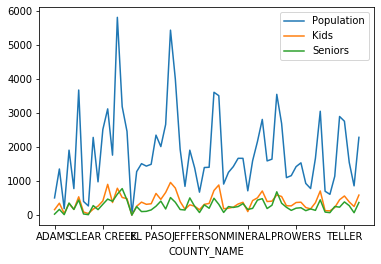

In [113]:
# median, population kids, seniors la 1 mile
median_p.plot(label="Population")
median_k.plot(label="Kids")
median_s.plot(label="Seniors")
plt.legend()

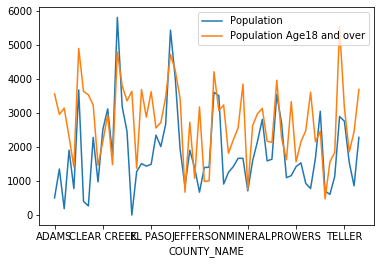

In [105]:
#group ages by county
pop_18=combined_data_df[['COUNTY_NAME', 'Adult_Population_Age18_and_over']].groupby('COUNTY_NAME').median()['Adult_Population_Age18_and_over']
# combined_data_df
median_p.plot(label="Population")
pop_18.plot(label="Population Age18 and over")
plt.legend()
plt.show()

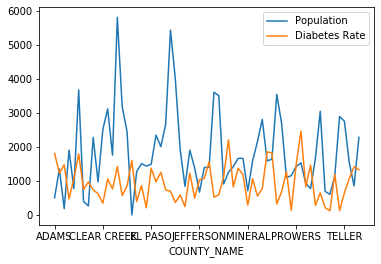

In [106]:
#group adj diabetes rate by county
diab_rate=combined_data_df[['COUNTY_NAME', 'DIABETES_ADJRATE']].groupby('COUNTY_NAME').median()['DIABETES_ADJRATE']
# combined_data_df
median_p.plot(label="Population")
diab_rate.plot(label="Diabetes Rate")
plt.legend()
plt.show()

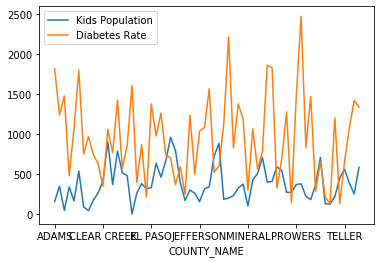

In [107]:
#group adj diabetes rate by county --kids
diab_rate=combined_data_df[['COUNTY_NAME', 'DIABETES_ADJRATE']].groupby('COUNTY_NAME').median()['DIABETES_ADJRATE']
# combined_data_df
median_k.plot(label="Kids Population")
diab_rate.plot(label="Diabetes Rate")
plt.legend()
plt.show()

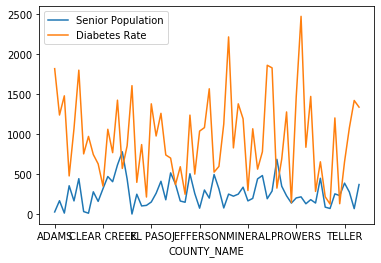

In [108]:
#group adj diabetes rate by county --kids
diab_rate=combined_data_df[['COUNTY_NAME', 'DIABETES_ADJRATE']].groupby('COUNTY_NAME').median()['DIABETES_ADJRATE']
# combined_data_df
median_s.plot(label="Senior Population")
diab_rate.plot(label="Diabetes Rate")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1,) and (64,)

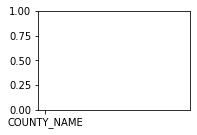

In [114]:

# fig = plt.figure(figsize=(20, 7))
# axes = fig.add_subplot(111)
# axes.plot(median_p)
# # 
# x= ['COUNTY_NAME']
# y1= median_p
# fig = plt.figure()
# fig.add_subplot(221)   #top left
# fig.add_subplot(222)   #top right
# fig.add_subplot(223)   #bottom left
# fig.add_subplot(224)   #bottom right 
# plt.show()

In [109]:
# x_values = combined_data_df[float(['lapop1'])]
# y_values = narrowed_data['Census_Tract_Estimate']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('lapop1')
# plt.ylabel('Census_Tract_Estimate')
# plt.title('lapop1 by Census_Tract_Estimate')
# correlation = st.pearsonr(x_values, y_values)
# print(f"The correlation between both factors is {round(correlation[0],2)}")
# plt.show()

In [110]:
# total_pop = combined_grouped_counties["Population_Total"]
# diab_rate = combined_grouped_counties["Diabetes_Census_Tract_Estimate"]
# plt.scatter(total_pop,diab_rate, marker="o", facecolors="blue", edgecolors="black")
# plt.title("Population vs. Estimate Diabetes Rates (%)")
# plt.xlabel("Population")
# plt.ylabel("Estimated Diabetes Rates (%)")
# plt.show()

In [111]:
# plt.scatter(combined_data['Median_Household_Income']['mean'], diab_summary_df['Census_Tract_Estimate']['mean'], 
#             marker='o', facecolors='lightblue', edgecolors='black')
# plt.xlabel('Median Household Income')
# plt.ylabel('Diabetes Percent Diagnosis')
# plt.title('A Comparison of Diabetes Diagnosis and Median Household Income')

# median_income = df_clean.iloc[:,10]
# diabetes = df_clean.iloc[:,6]
# correlation = st.pearsonr(median_income,diabetes)
# print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
# la_people, = plt.plot(x,y, color="blue")
# combine the counties together
# combined_grouped_counties=combined_data_df.groupby('COUNTY_NAME')
# combined_grouped_counties.head()